In [2]:
pwd

'/mmfs1/data/aglinska/BC-fMRI-AE/Notebooks'

In [3]:
%%time
import numpy as np
import pandas as pd
import ants

CPU times: user 2.43 s, sys: 3.66 s, total: 6.1 s
Wall time: 9.8 s


In [4]:
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('../Data/ABIDE_df2.csv')
df

,participant_id,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,...,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI,bids_folder,site
0,50002,1,1.0,16.77,1,Ambi,NaN,103.0,116.0,89.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050002,13
1,50003,1,1.0,24.45,1,R,NaN,124.0,128.0,115.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050003,13
2,50004,1,1.0,19.09,1,R,NaN,113.0,108.0,117.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050004,13
3,50005,1,1.0,13.73,2,R,NaN,119.0,117.0,118.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050005,13
4,50006,1,1.0,13.37,1,L,NaN,109.0,99.0,119.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050006,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,51583,1,2.0,35.00,1,NaN,100.0,95.0,105.0,84.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-SBL0051583,14
1044,51584,1,2.0,49.00,1,NaN,100.0,NaN,133.0,135.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,23.24,sub-SBL0051584,14
1045,51585,1,1.0,27.00,1,NaN,90.0,96.0,99.0,106.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-SBL0051585,14
1046,51606,1,2.0,29.00,2,R,NaN,118.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-MaxMuna0051606,6


In [6]:
mepi = ants.image_read('../Data/GlasserAtlas/ABIDE_mepi.nii.gz')
rois = ants.image_read('../Data/GlasserAtlas/glasser360MNI.nii')

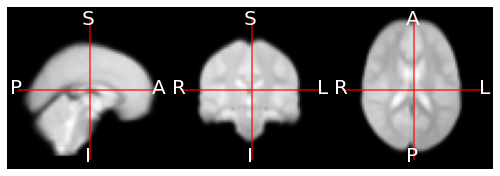

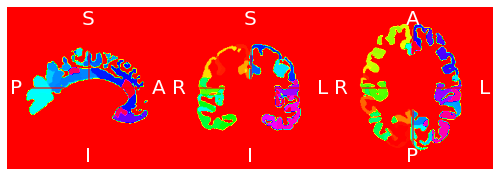

In [7]:
mepi.plot_ortho(flat=True)
rois.plot_ortho(flat=True,cmap='hsv')

In [8]:
mepi

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (61, 73, 61)
	 Spacing    : (3.0, 3.0, 3.0)
	 Origin     : (-90.0, 126.0, -72.0)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [9]:
rois

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (182, 218, 182)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-90.0, 126.0, -72.0)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [10]:
epi_rois = rois.resample_image_to_target(target=mepi,interp_type='genericLabel')

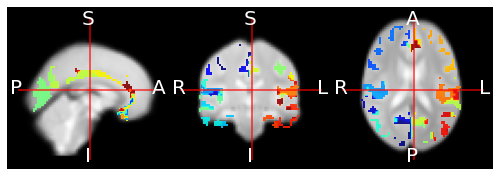

In [11]:
mepi.plot_ortho(epi_rois,flat=True)

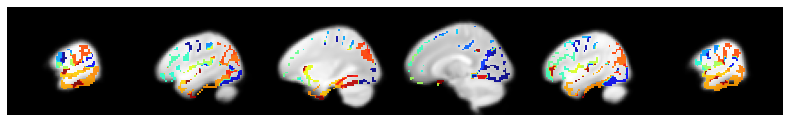

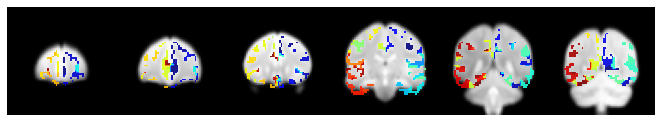

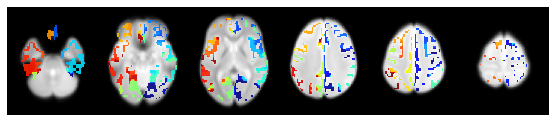

In [12]:
mepi.plot(epi_rois,slices=[10,15,20,35,45,50],axis=0)
mepi.plot(epi_rois,slices=[10,15,20,35,45,50],axis=1)
mepi.plot(epi_rois,slices=[15,20,25,35,40,45],axis=2)

In [13]:
epi_rois.to_filename('../Data/GlasserAtlas/epi_rois.nii.gz')

In [14]:
flat_mepi = mepi.numpy().reshape(-1)
flat_rois = epi_rois.numpy().reshape(-1)

In [15]:
(flat_mepi[flat_rois!=0]==0).sum()

0

### Extract Data

In [16]:
func_dir = '../../data/ABIDE/Outputs/cpac/filt_noglobal/func_preproc/'

In [17]:
import os
funcFiles = [file for file in os.listdir(func_dir) if file.endswith('.nii.gz')]
funcFiles.sort()
funcFile_ids = np.array([int(funcFile.split('_')[-3]) for funcFile in funcFiles])

In [18]:
#subs = df['bids_folder'].values
#pid = df['participant_id'].values[s]
df['funcFile'] = [funcFiles[np.argwhere(funcFile_ids==pid)[0][0]] for pid in df['participant_id'].values]
df.to_csv('../Data/ABIDE_df3.csv')

In [19]:
def get_Rdata(epi,epi_rois):
    
    
    import warnings
    warnings.filterwarnings(action='ignore', message='Mean of empty slice') 
    warnings.filterwarnings(action='ignore', message='invalid value encountered in true_divide') 
    

    assert epi.shape[0:3]==epi_rois.shape, 'dumbass'
    
    flat_epi = epi.numpy().reshape(-1,epi.shape[-1])
    flat_rois = epi_rois.numpy().reshape(-1)
    
#     this_epi = flat_epi.copy()
#     this_rois = flat_rois.copy()

    this_epi = flat_epi
    this_rois = flat_rois

   # Slice the sucker
    e = np.repeat(True,flat_epi.shape[0])
    e *= flat_rois!=0
    e *= flat_epi.std(axis=1)>10
    e *= np.isnan(flat_epi).sum(axis=1)==0
    
    this_rois = this_rois[e]
    this_epi = this_epi[e,:]
    
    rlist = np.arange(1,361)
    roi_timeseries = np.array([this_epi[this_rois==r,:].mean(axis=0) for r in rlist])
    cmat = np.corrcoef(np.array([this_epi[this_rois==r,:].mean(axis=0) for r in rlist]))
    
    rData = dict()
    rData['roi_timeseries'] = roi_timeseries
    rData['cmat'] = cmat
    rData['e'] = e
    
    return rData

In [20]:
#%%time
from tqdm import tqdm
ofn = '../Assets/glasser2016_cmats/filt_noglobal'

nsubs = len(df)

for s in tqdm(range(nsubs)):
    pid = df['participant_id'].values[s]
    funcFile = df['funcFile'].values[s]

    fn = func_dir+funcFile
    epi = ants.image_read(fn)

    rData = get_Rdata(epi,epi_rois)

    roi_timeseries = rData['roi_timeseries']
    cmat = rData['cmat']

    np.save(file=os.path.join(ofn,'cmat',str(pid)),arr=cmat)
    np.save(file=os.path.join(ofn,'roi_timeseries',str(pid)),arr=roi_timeseries)

  0%|          | 0/1048 [00:02<?, ?it/s]


KeyboardInterrupt: 

### Collect Data

In [21]:
from tqdm import tqdm
import numpy as np
import os
import seaborn as sns
nsubs = len(df)
ofn = '../Assets/glasser2016_cmats/filt_noglobal'

In [22]:
cmats = np.array([np.load(os.path.join(ofn,'cmat',str(df['participant_id'].values[i])+'.npy')) for i in tqdm(range(nsubs))])

100%|██████████| 1048/1048 [00:04<00:00, 260.61it/s]


In [23]:
rois_timeseries = [np.load(os.path.join(ofn,'roi_timeseries',str(df['participant_id'].values[i])+'.npy')) for i in tqdm(range(nsubs))]

100%|██████████| 1048/1048 [00:02<00:00, 366.49it/s]


In [24]:
rlbls = pd.read_csv('../Data/GlasserAtlas/glasser360NodeNames.txt',header=None)
rlbls = rlbls[0].to_list()
rlbls = np.array(rlbls)

In [25]:
# avg_cmat = np.nanmean(cmats,axis=0)
# plt.imshow(avg_cmat)

In [26]:
#np.isnan(rois_timeseries).sum()

In [27]:
isnan = np.array([rois_timeseries[i].mean(axis=1) for i in range(nsubs)])
isnan = np.isnan(isnan)

In [28]:
(isnan.sum(axis=1)!=0).sum()

214

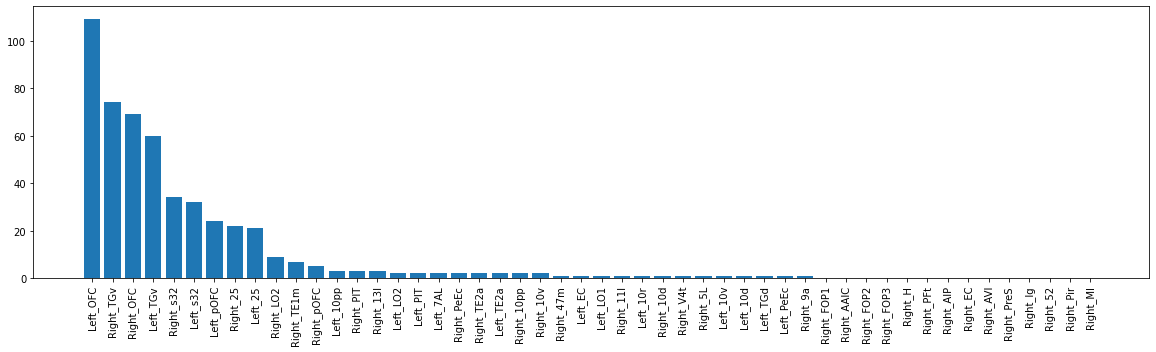

In [38]:
ys = isnan.sum(axis=0)
I = np.argsort(ys)[::-1]
ys = ys[I]
xs = np.arange(len(ys))
olbls = rlbls[I]

l = 50
xs = xs[0:l]
ys = ys[0:l]
olbls = olbls[0:l]


plt.figure(figsize=(20,5))
plt.bar(xs,ys)
plt.xticks(xs,labels=olbls,rotation=90);

In [39]:
len(I)

360

In [40]:
bad_rois = pd.DataFrame()
bad_rois['rlbl'] = rlbls[I]
bad_rois['nan_count'] = isnan.sum(axis=0)[I]
bad_rois['I'] = I
bad_rois.to_csv('../Data/GlasserAtlas/bad_rois.csv')

Interactive namespace is empty.


In [63]:
olbls[0:24]

array(['Left_OFC', 'Right_TGv', 'Right_OFC', 'Left_TGv', 'Right_s32',
       'Left_s32', 'Left_pOFC', 'Right_25', 'Left_25', 'Right_LO2',
       'Right_TE1m', 'Right_pOFC', 'Left_10pp', 'Right_PIT', 'Right_13l',
       'Left_LO2', 'Left_PIT', 'Left_7AL', 'Right_PeEc', 'Right_TE2a',
       'Left_TE2a', 'Right_10pp', 'Right_10v', 'Right_47m'], dtype='<U12')

In [60]:
to_drop = olbls[0:12]
#to_drop = []

In [34]:
print(olbls[0:12])

['Left_OFC' 'Right_TGv' 'Right_OFC' 'Left_TGv' 'Right_s32' 'Left_s32'
 'Left_pOFC' 'Right_25' 'Left_25' 'Right_LO2' 'Right_TE1m' 'Right_pOFC']


In [35]:
rslice = np.array([rlbl not in to_drop for rlbl in rlbls])
print(rslice.sum())

348


In [36]:
new_cmats = np.array([np.corrcoef(rois_timeseries[s][rslice,:]) for s in tqdm(range(nsubs))])

100%|██████████| 1048/1048 [00:01<00:00, 589.80it/s]


In [34]:
subSlice = (np.isnan(new_cmats).sum(axis=-1).sum(axis=-1)!=0)
subSlice.sum()

18

In [35]:
new_cmats2 = new_cmats[~subSlice,:,:]
new_cmats2.shape

(1030, 348, 348)

In [45]:
new_cmats2.shape

(1030, 348, 348)

In [58]:
subs = df['participant_id'].values[~subSlice]
subs.shape

(1030,)

In [64]:
%%time
np.savez_compressed(file=os.path.join(ofn,'cmats_1030.npz'),data=new_cmats2,subs=subs,rnames=rlbls[rslice])

## TRIM ATLAS

In [53]:
drop_rois = ['Left_OFC' ,'Right_TGv', 'Right_OFC', 'Left_TGv', 'Right_s32', 'Left_s32',
 'Left_pOFC' ,'Right_25' ,'Left_25', 'Right_LO2', 'Right_TE1m' ,'Right_pOFC']

In [54]:
rlbls = pd.read_csv('../Data/GlasserAtlas/glasser360NodeNames.txt',header=None,names=['lbl'])
rlbls['idx'] = np.arange(1,len((rlbls))+1)
rlbls.head(3)

,lbl,idx
0,Right_V1,1
1,Right_MST,2
2,Right_V6,3


In [60]:
rslice = np.array([rlbl not in drop_rois for rlbl in rlbls['lbl'].values])

In [61]:
drop_rois

['Left_OFC',
 'Right_TGv',
 'Right_OFC',
 'Left_TGv',
 'Right_s32',
 'Left_s32',
 'Left_pOFC',
 'Right_25',
 'Left_25',
 'Right_LO2',
 'Right_TE1m',
 'Right_pOFC']

In [80]:
rlbls_new = rlbls.copy()
rlbls_new = rlbls_new.iloc[rslice]
rlbls_new['idx2'] = np.arange(1,len(rlbls_new)+1)
print(rlbls_new.shape)
rlbls_new.sample(5)

(348, 3)


,lbl,idx,idx2
322,Left_PGp,323,315
80,Right_IFSp,81,80
289,Left_Pir,290,282
110,Right_AVI,111,109
108,Right_MI,109,107


In [106]:
mepi = ants.image_read('../Data/GlasserAtlas/ABIDE_mepi.nii.gz')
epi_rois = ants.image_read('../Data/GlasserAtlas/epi_rois.nii.gz')
#epi_rois_trimmed = epi_rois.new_image_like(np.zeros(epi_rois.shape))
epi_rois_trimmed_old = epi_rois.new_image_like(np.zeros(epi_rois.shape))

In [107]:
for r in range(len(rlbls_new)):
    #epi_rois_trimmed[epi_rois==rlbls_new['idx'].values[r]]=rlbls_new['idx2'].values[r]
    epi_rois_trimmed_old[epi_rois==rlbls_new['idx'].values[r]]=rlbls_new['idx'].values[r]

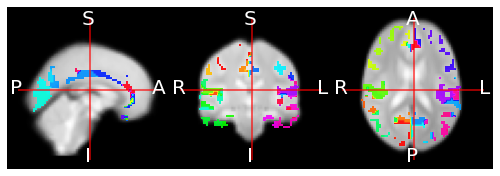

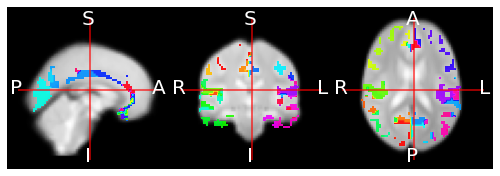

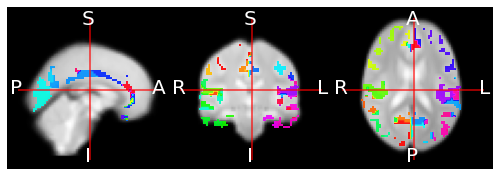

In [108]:
mepi.plot_ortho(epi_rois_trimmed,flat=True,overlay_cmap='hsv')
mepi.plot_ortho(epi_rois,flat=True,overlay_cmap='hsv')
mepi.plot_ortho(epi_rois_trimmed_old,flat=True,overlay_cmap='hsv')

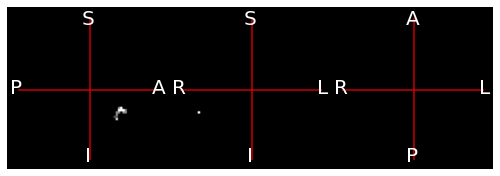

In [113]:
epi_rois_diff = epi_rois.copy()
epi_rois_diff[epi_rois_trimmed_old==epi_rois]=0
epi_rois_diff.plot_ortho(flat=True)

In [114]:
epi_rois_diff.to_filename('../Data/GlasserAtlas/epi_rois_diff.nii.gz')

In [105]:
epi_rois_trimmed.to_filename('../Data/GlasserAtlas/epi_rois_trimmed.nii.gz')
rlbls_new.to_csv('../Data/GlasserAtlas/rnames_trimmed.csv')